
## EDA SAQ


In [1]:
# import librairies

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(palette ='dark', style = 'darkgrid', context = 'notebook')

#### Load and cleaning data

In [2]:
# Load the data
file_path = 'donne_saq/vente_saq.csv'
data = pd.read_csv(file_path, delimiter=';')

# Renaming columns for easier access
data.columns = [
    'Succursale', 'Succursale_nom', 'Annee_periode', 'No_article', 'Article', 
    'Type_listing', 'nb_bouteille_vendue', 'Mt_vente_brute_calculé_SVH', 
    'Recap_Qte_facturee_SVH', 'Recap_Mt_vente_brute_calculé_SVH'
]

# Splitting 'Annee_periode' into 'Year' and 'Period'
data['Year'] = data['Annee_periode'].astype(str).str[:4].astype(int)
data['Period'] = data['Annee_periode'].astype(str).str[4:].astype(int)

# Converting the sales amount to a numerical format
data['Mt_vente_brute_calculé_SVH'] = data['Mt_vente_brute_calculé_SVH'].str.replace(',', '.').astype(float)

# Dropping unnecessary recap columns
data = data.drop(columns=['Recap_Qte_facturee_SVH', 'Recap_Mt_vente_brute_calculé_SVH'])


C:\Users\User\AppData\Local\Temp\ipykernel_2408\683774382.py:3: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path, delimiter=';')


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289007 entries, 0 to 289006
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Succursale                  289007 non-null  int64  
 1   Succursale_nom              289007 non-null  object 
 2   Annee_periode               289007 non-null  int64  
 3   No_article                  289007 non-null  int64  
 4   Article                     289007 non-null  object 
 5   Type_listing                289007 non-null  object 
 6   nb_bouteille_vendue         289007 non-null  int64  
 7   Mt_vente_brute_calculé_SVH  289007 non-null  float64
 8   Year                        289007 non-null  int32  
 9   Period                      289007 non-null  int32  
dtypes: float64(1), int32(2), int64(4), object(3)
memory usage: 19.8+ MB


In [4]:
# Group by Year and Period to observe trends over time for each product and shop
trend_data = data.groupby(['Year', 'Period', 'Succursale_nom', 'Article']).agg(
    {'nb_bouteille_vendue': 'sum', 'Mt_vente_brute_calculé_SVH': 'sum'}).reset_index()

# Identify peak sales periods and any patterns or anomalies
peak_sales_periods = trend_data.sort_values(by='nb_bouteille_vendue', ascending=False).head(10)

# Comparisons of sales performance across the four shops
sales_performance = data.groupby(['Succursale_nom', 'Article']).agg(
    {'nb_bouteille_vendue': 'sum', 'Mt_vente_brute_calculé_SVH': 'sum'}).reset_index()

# Identify products that perform well universally versus those that have shop-specific trends
universal_performers = sales_performance.groupby('Article').agg(
    {'nb_bouteille_vendue': 'mean', 'Mt_vente_brute_calculé_SVH': 'mean'}).sort_values(
    by='nb_bouteille_vendue', ascending=False).head(10)

# Analyze which types of products are most popular in each shop
popular_products_per_shop = data.groupby(['Succursale_nom', 'Type_listing']).agg(
    {'nb_bouteille_vendue': 'sum', 'Mt_vente_brute_calculé_SVH': 'sum'}).reset_index()

## Analysis and Exploring

#### Table of ammount brut by period and by shop

In [5]:

# Grouping data by period and shop to get the sum of 'Mt_vente_brute_calculé_SVH'
amounts_by_period_and_shop = data.groupby(['Year', 'Period', 'Succursale_nom']).agg(
    {'Mt_vente_brute_calculé_SVH': 'sum'}).reset_index()

# Creating a pivot table to have periods as rows and shops as columns
pivot_table = amounts_by_period_and_shop.pivot_table(
    index=['Year', 'Period'], columns='Succursale_nom', values='Mt_vente_brute_calculé_SVH', aggfunc='sum').reset_index()

# Display the pivot table
pivot_table


Succursale_nom,Year,Period,Faubourg Sainte-Catherine,Sainte-Catherine Ouest - Lambert Closse,Ste-Catherine Ouest - Stanley,Westmount
0,2021,4,143738.65,219978.76,220638.01,562668.29
1,2021,5,311685.79,461562.75,506149.11,1024794.23
2,2021,6,338738.05,454299.75,588979.80,1073543.16
3,2021,7,355725.50,468867.65,578582.29,1096753.36
4,2021,8,365535.30,491185.85,571546.42,1147598.90
5,2021,9,348790.10,535721.25,562511.65,1334995.05
6,2021,10,415036.74,682901.39,611203.86,1719784.57
7,2021,11,272647.29,373426.57,282862.91,778000.77
8,2021,12,322806.75,415563.26,358655.01,1095241.07
9,2021,13,326213.85,396662.15,450464.75,854267.70


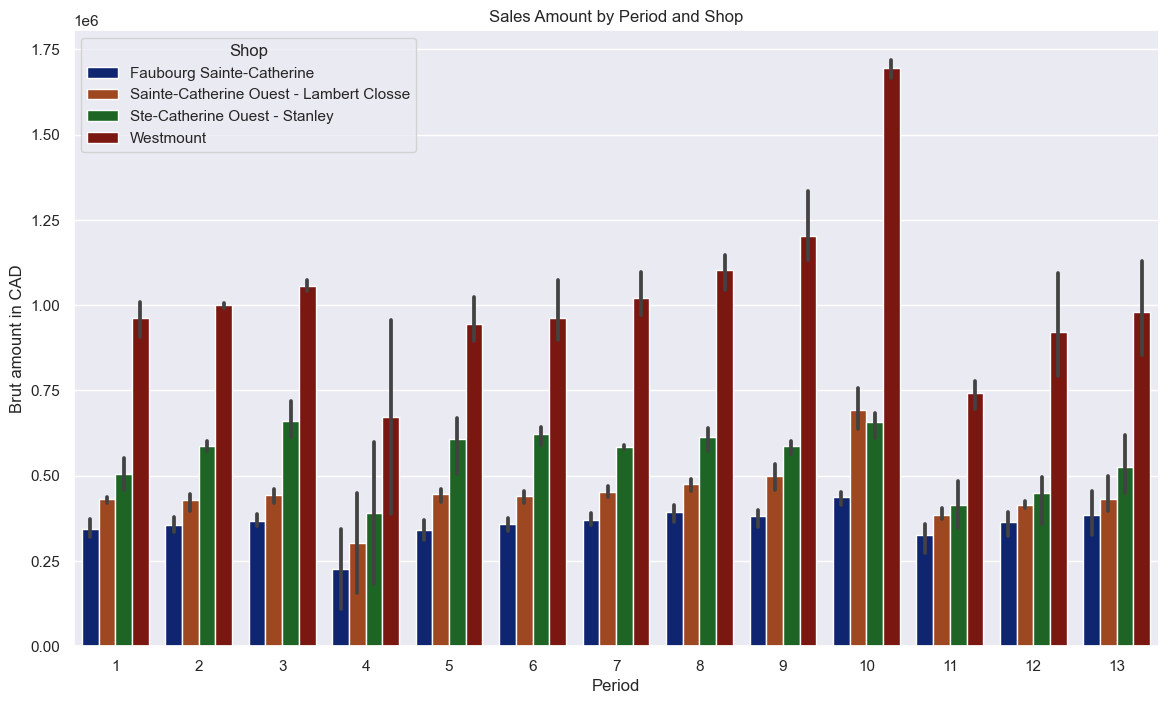

In [22]:
# Grouping data by period and shop to get the sum of 'Mt_vente_brute_calculé_SVH'
amounts_by_period_and_shop = data.groupby(['Year', 'Period', 'Succursale_nom']).agg(
    {'Mt_vente_brute_calculé_SVH': 'sum'}).reset_index()

# Creating a pivot table to have periods as rows and shops as columns
pivot_table = amounts_by_period_and_shop.pivot_table(
    index=['Year', 'Period'], columns='Succursale_nom', values='Mt_vente_brute_calculé_SVH', aggfunc='mean').reset_index()

# Melting the pivot table to long format for seaborn
pivot_table_melted = pd.melt(pivot_table, id_vars=['Year', 'Period'], var_name='Shop', value_name='Amount_CAD')

# Creating a bar plot to show the pivot table
plt.figure(figsize=(14, 8))
sns.barplot(data=pivot_table_melted, x='Period', y='Amount_CAD', hue='Shop')
plt.title('Sales Amount by Period and Shop')
plt.xlabel('Period')
plt.ylabel('Brut amount in CAD')
plt.legend(title='Shop')
plt.show()


C:\Users\User\anaconda\envs\pandas_playground\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda\envs\pandas_playground\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda\envs\pandas_playground\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\User\anaconda\envs\pandas_playground\Lib\site-packages\seaborn\_oldcore.py:1075: Fu

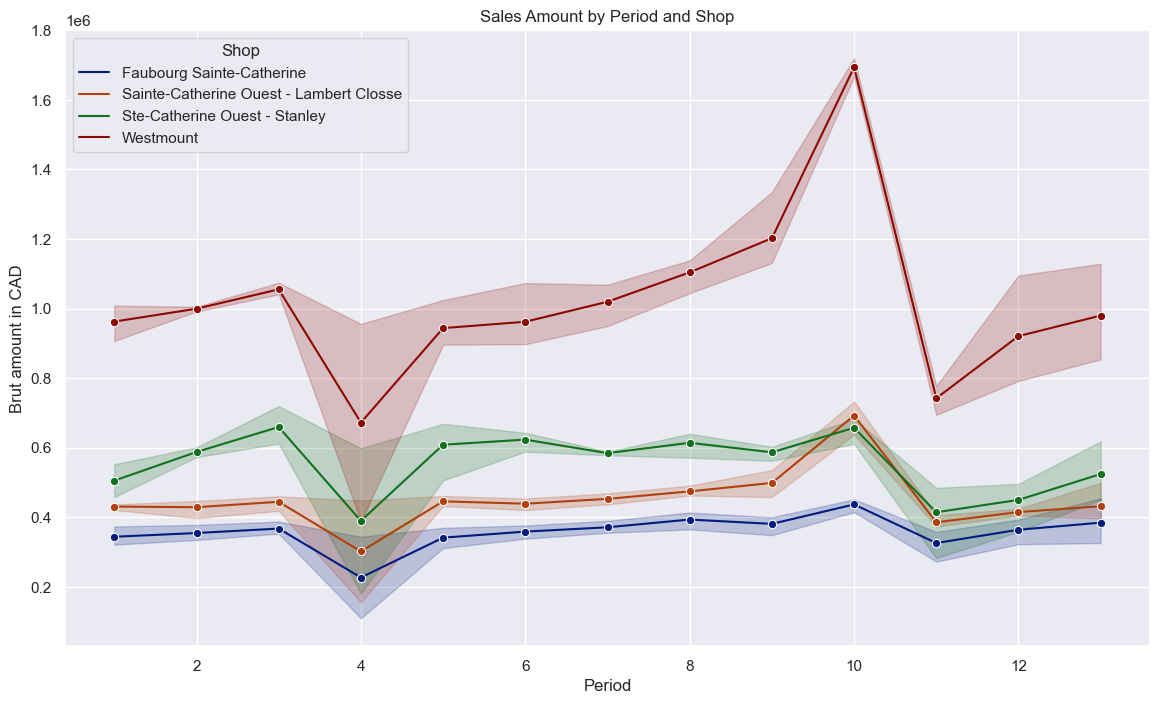

In [36]:
# Grouping data by period and shop to get the sum of 'Mt_vente_brute_calculé_SVH'
amounts_by_period_and_shop = data.groupby(['Year', 'Period', 'Succursale_nom']).agg(
    {'Mt_vente_brute_calculé_SVH': 'sum'}).reset_index()

# Creating a pivot table to have periods as rows and shops as columns
pivot_table = amounts_by_period_and_shop.pivot_table(
    index=['Year', 'Period'], columns='Succursale_nom', values='Mt_vente_brute_calculé_SVH', aggfunc='sum').reset_index()

# Melting the pivot table to long format for seaborn
pivot_table_melted = pd.melt(pivot_table, id_vars=['Year', 'Period'], var_name='Shop', value_name='Amount_CAD')

# Creating a line plot to show the pivot table
plt.figure(figsize=(14, 8))
sns.lineplot(data=pivot_table_melted, x='Period', y='Amount_CAD', hue='Shop', marker='o')
plt.title('Sales Amount by Period and Shop')
plt.xlabel('Period')
plt.ylabel('Brut amount in CAD')
plt.legend(title='Shop')
plt.show()

C:\Users\User\anaconda\envs\pandas_playground\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda\envs\pandas_playground\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda\envs\pandas_playground\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\User\anaconda\envs\pandas_playground\Lib\site-packages\seaborn\_oldcore.py:1075: Fu

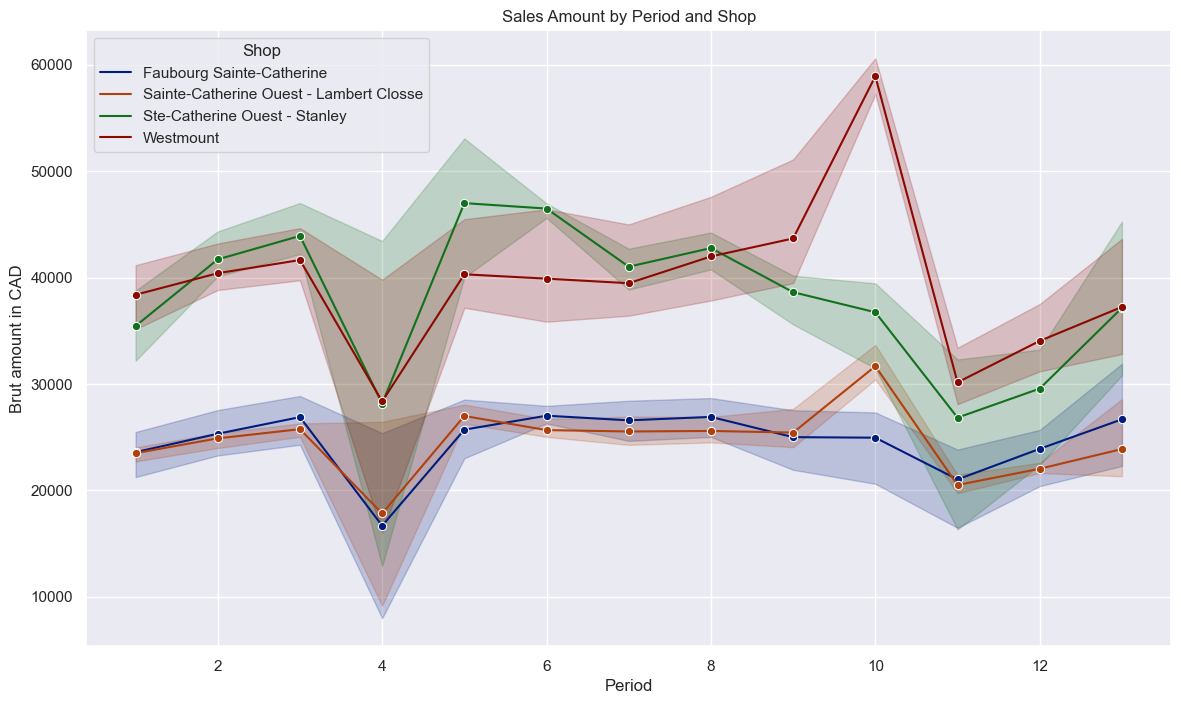

In [42]:
# Grouping data by period and shop to get the sum of 'nb_bouteille_vendue'
amounts_by_period_and_shop = data.groupby(['Year', 'Period', 'Succursale_nom']).agg(
    {'nb_bouteille_vendue': 'sum'}).reset_index()

# Creating a pivot table to have periods as rows and shops as columns
pivot_table = amounts_by_period_and_shop.pivot_table(
    index=['Year', 'Period'], columns='Succursale_nom', values='nb_bouteille_vendue', aggfunc='sum').reset_index()

# Melting the pivot table to long format for seaborn
pivot_table_melted = pd.melt(pivot_table, id_vars=['Year', 'Period'], var_name='Shop', value_name='Amount_CAD')

# Creating a line plot to show the pivot table
plt.figure(figsize=(14, 8))
sns.lineplot(data=pivot_table_melted, x='Period', y='Amount_CAD', hue='Shop', marker='o')
plt.title('number of article sold by Period and Shop')
plt.xlabel('Period')
plt.ylabel('Brut amount in CAD')
plt.legend(title='Shop')
plt.show()

In [41]:
forecast_results_df.head(50)

,ds,yhat,Succursale_nom
0,2021-05-01,6.233889e+05,Westmount
1,2021-06-01,1.066693e+06,Westmount
2,2021-07-01,1.084727e+06,Westmount
3,2021-08-01,1.064858e+06,Westmount
4,2021-09-01,1.096487e+06,Westmount
5,2021-10-01,1.267065e+06,Westmount
6,2021-11-01,1.693207e+06,Westmount
7,2021-12-01,7.471157e+05,Westmount
8,2022-01-01,1.054368e+06,Westmount
9,2022-02-01,1.921486e+06,Westmount


##### This graph show us 2 pics, one down on period 4 and one up on period 10

C:\Users\User\anaconda\envs\pandas_playground\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda\envs\pandas_playground\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda\envs\pandas_playground\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda\envs\pandas_playground\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated

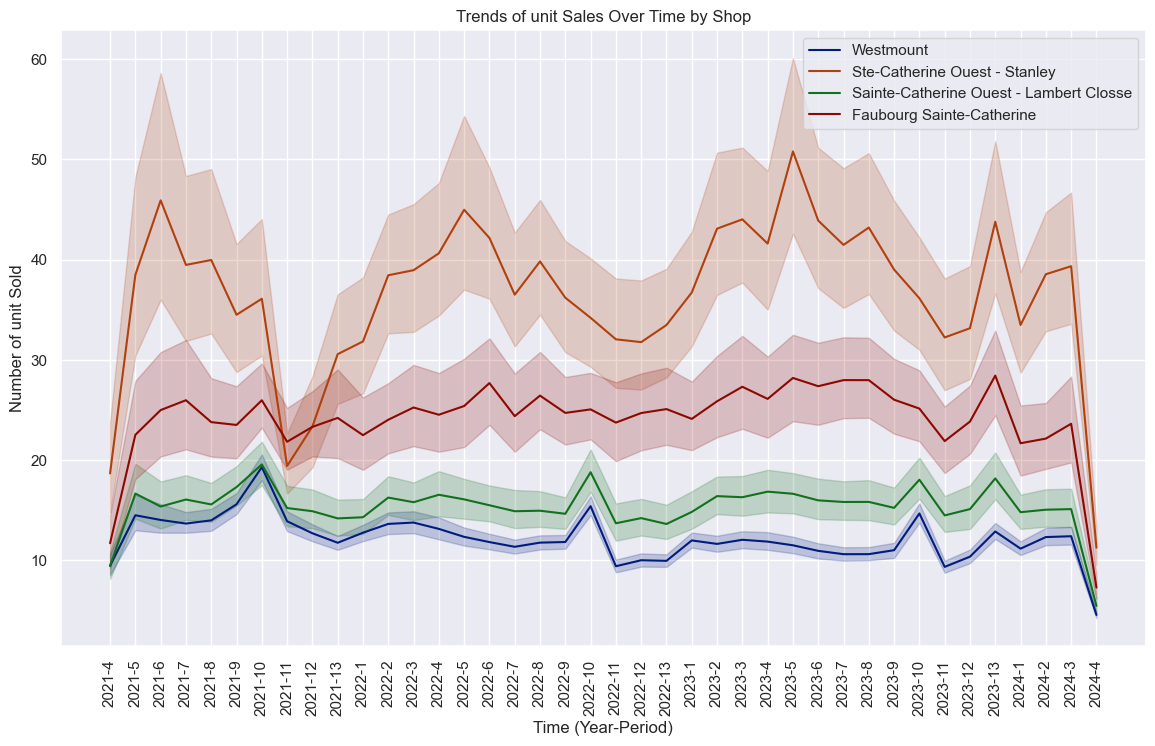

In [37]:
# Visualizations
plt.figure(figsize=(14, 8))
for shop in data['Succursale_nom'].unique():
    shop_data = trend_data[trend_data['Succursale_nom'] == shop]
    sns.lineplot(x=shop_data['Year'].astype(str) + '-' + shop_data['Period'].astype(str), 
                 y=shop_data['nb_bouteille_vendue'], label=shop)

plt.xticks(rotation=90)
plt.xlabel('Time (Year-Period)')
plt.ylabel('Number of unit Sold')
plt.title('Trends of unit Sales Over Time by Shop')
plt.legend()
plt.show()


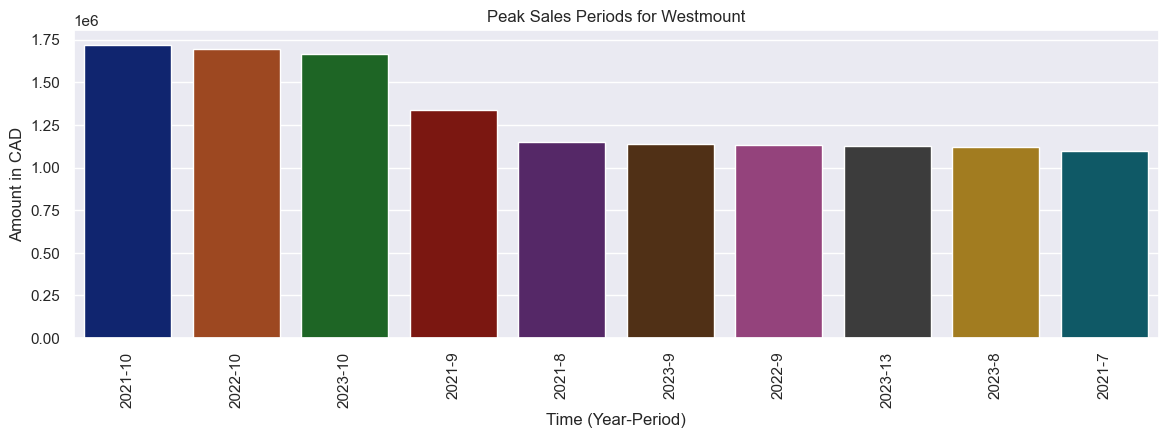

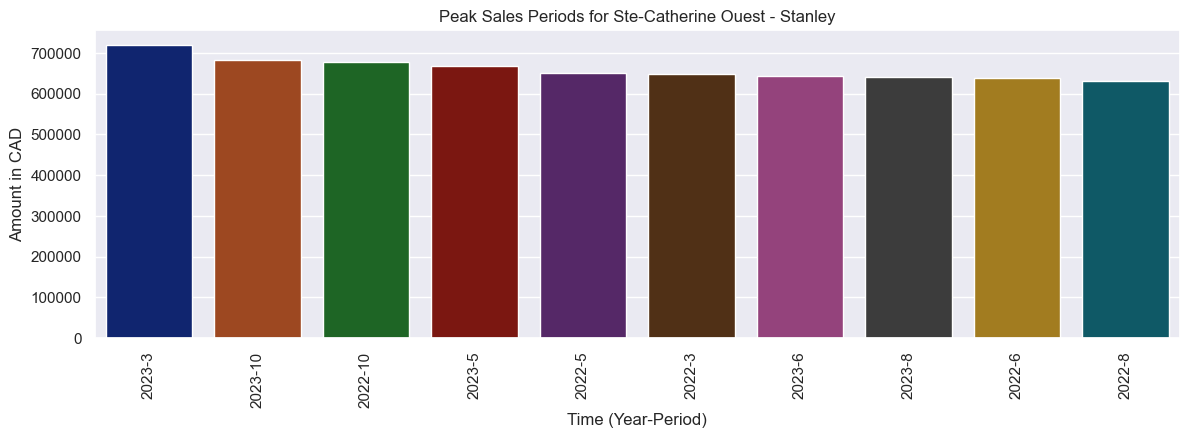

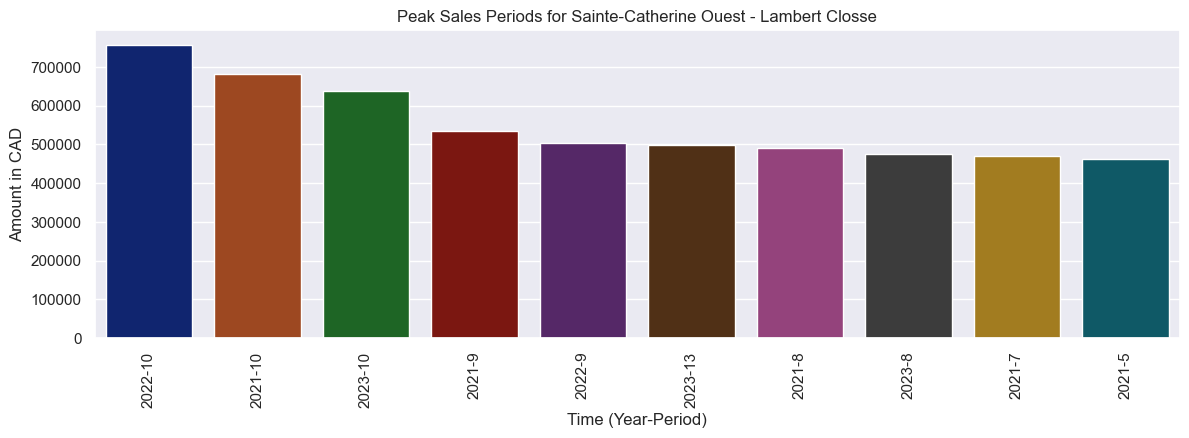

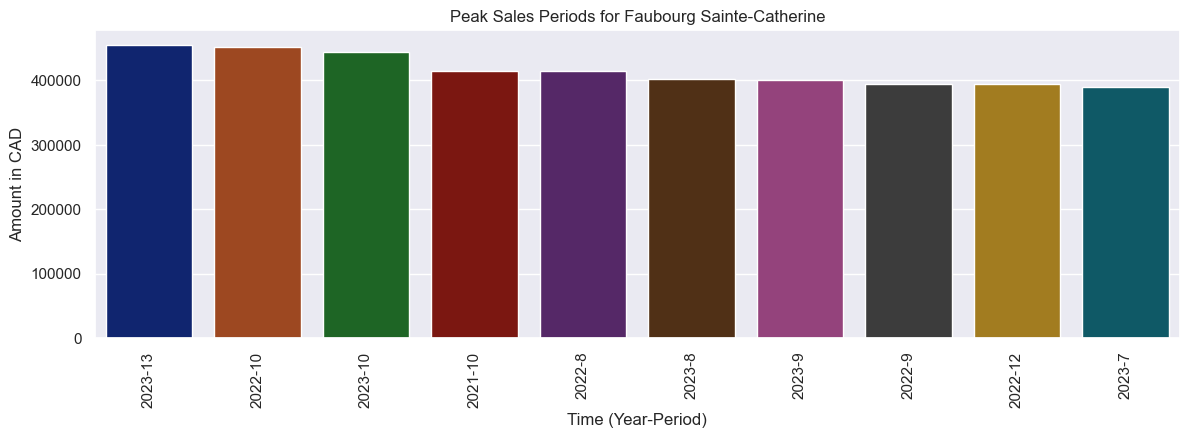

In [40]:
# Peak Sales Periods
# Grouping data by period and shop to get the sum of 'Mt_vente_brute_calculé_SVH'
amounts_by_period_and_shop = data.groupby(['Year', 'Period', 'Succursale_nom']).agg(
    {'Mt_vente_brute_calculé_SVH': 'sum'}).reset_index()

# Loop through each shop and create a bar plot for peak sales periods
for shop in data['Succursale_nom'].unique():
    shop_data = amounts_by_period_and_shop[amounts_by_period_and_shop['Succursale_nom'] == shop]
    
    # Find peak sales periods
    peak_sales_periods = shop_data.sort_values(by='Mt_vente_brute_calculé_SVH', ascending=False).head(10)
    peak_sales_periods['Year-Period'] = peak_sales_periods['Year'].astype(str) + '-' + peak_sales_periods['Period'].astype(str)
    
    plt.figure(figsize=(14, 4))
    sns.barplot(x=peak_sales_periods['Year-Period'], y=peak_sales_periods['Mt_vente_brute_calculé_SVH'])
    plt.xlabel('Time (Year-Period)')
    plt.ylabel('Amount in CAD')
    plt.title(f'Peak Sales Periods for {shop}')
    plt.xticks(rotation=90)
    plt.show()

#### P10 period seems to be one of the most important period

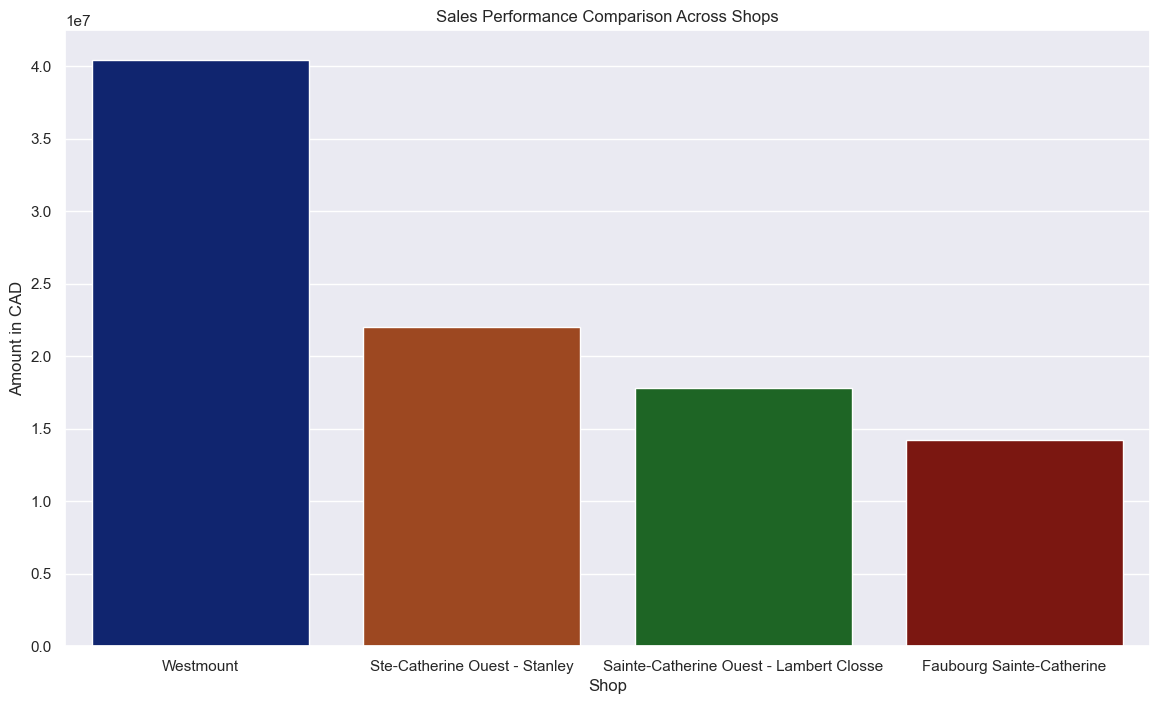

In [33]:
# Sales Performance Comparison
sales_performance_display = sales_performance.groupby('Succursale_nom').agg(
    {'Mt_vente_brute_calculé_SVH': 'sum'}).sort_values(by='Mt_vente_brute_calculé_SVH', ascending=False).reset_index()
plt.figure(figsize=(14, 8))
sns.barplot(x=sales_performance_display['Succursale_nom'], y=sales_performance_display['Mt_vente_brute_calculé_SVH'])
plt.xlabel('Shop')
plt.ylabel('Amount in CAD')
plt.title('Sales Performance Comparison Across Shops')
plt.show()


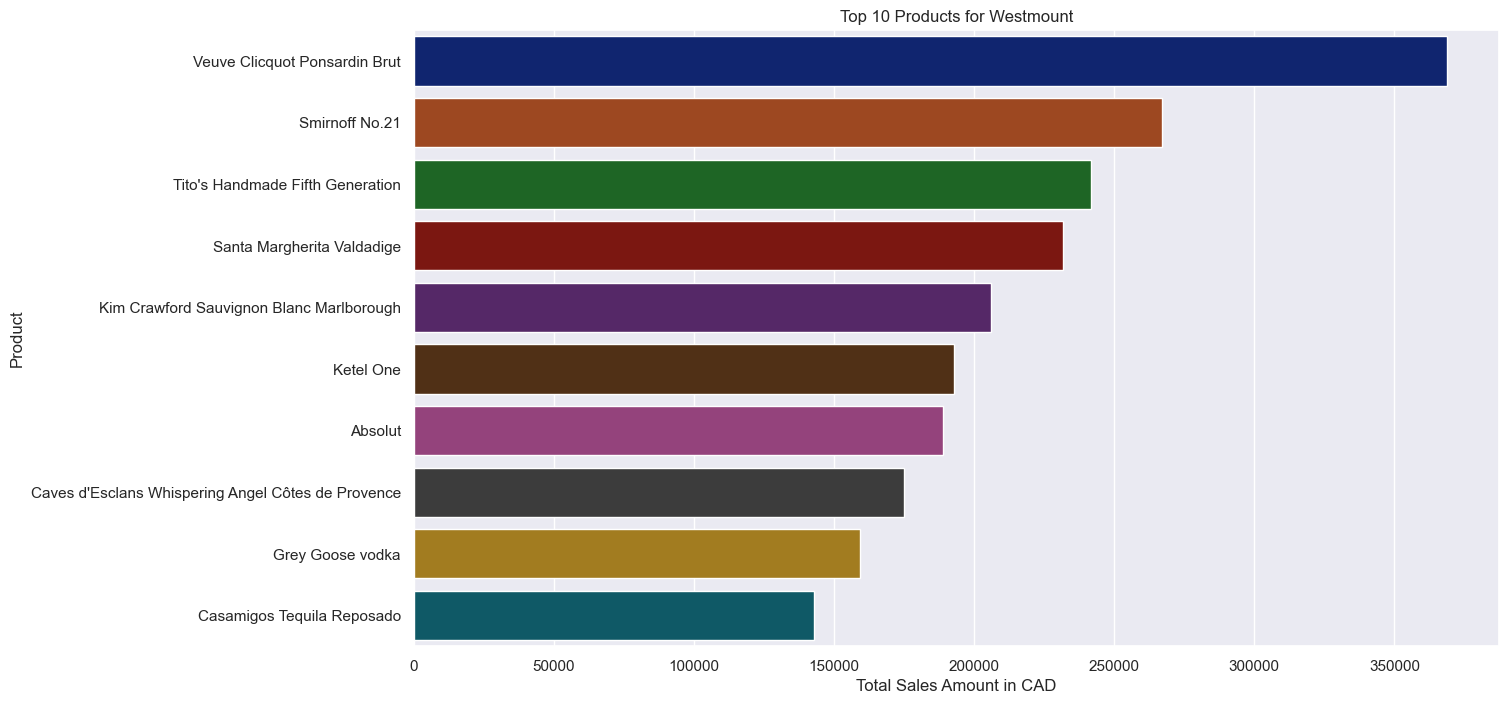

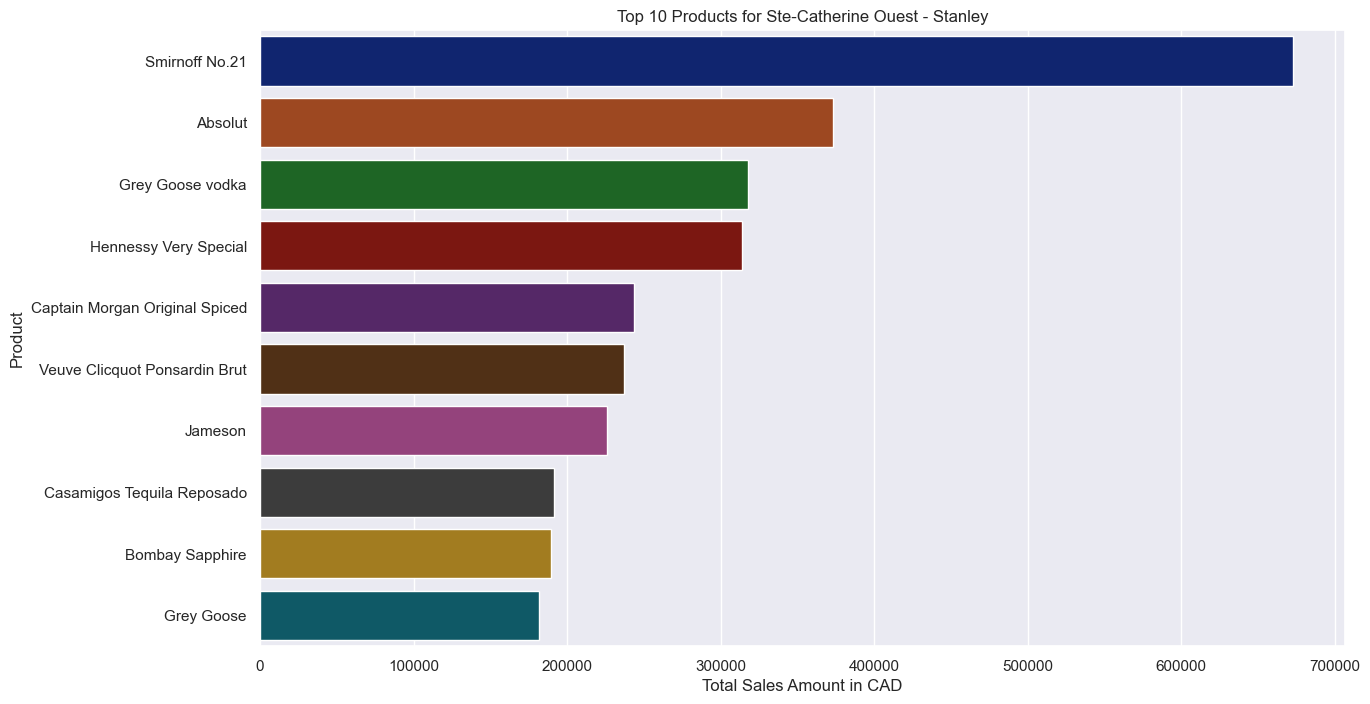

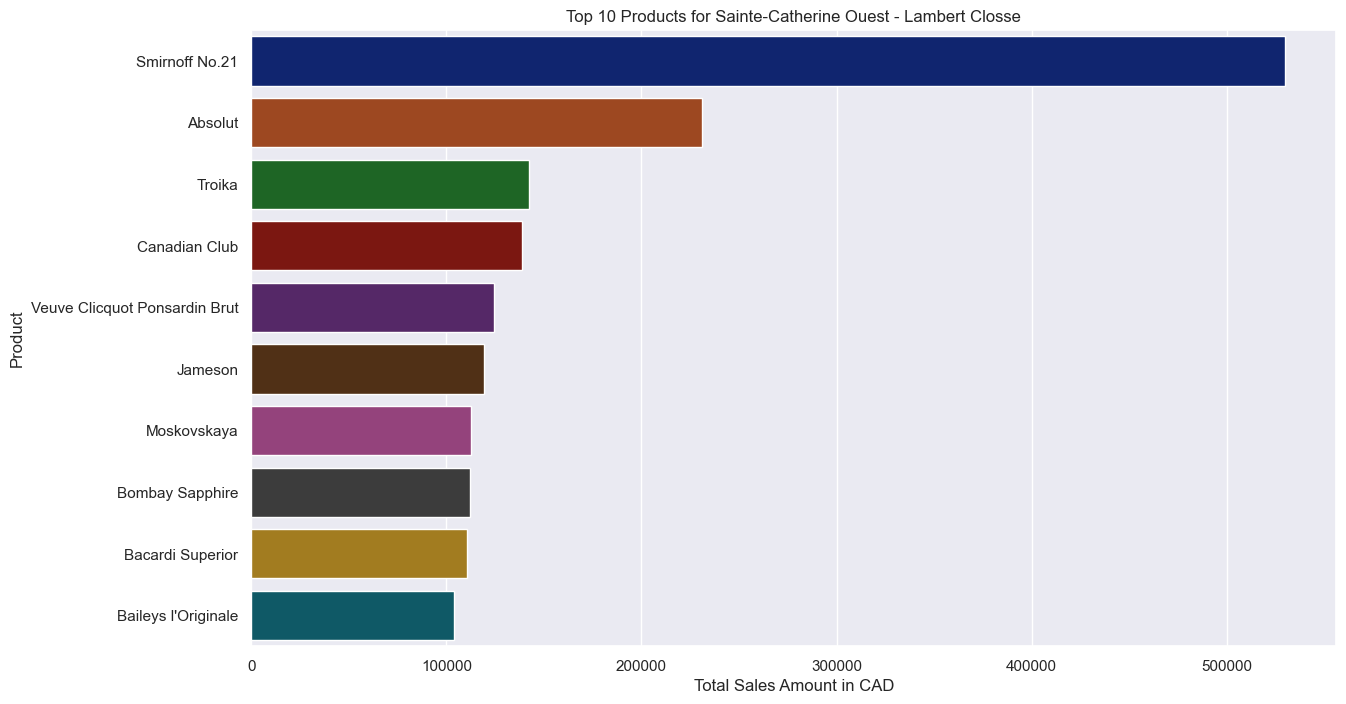

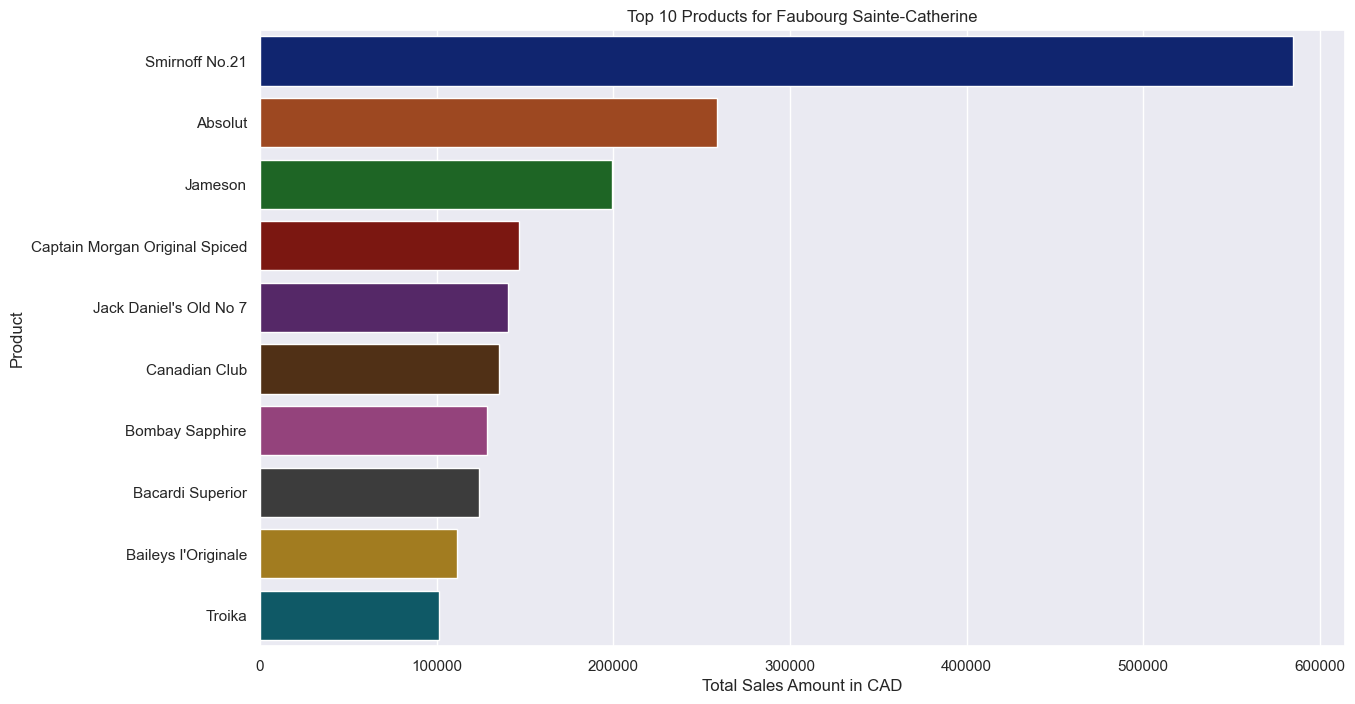

In [32]:
# Calculate the universal performers for each shop
shop_performers = data.groupby(['Succursale_nom', 'Article']).agg(
    {'Mt_vente_brute_calculé_SVH': 'sum'}).reset_index()

# Loop through each shop and create a bar plot
for shop in data['Succursale_nom'].unique():
    shop_data = shop_performers[shop_performers['Succursale_nom'] == shop]
    top_performers = shop_data.sort_values(by='Mt_vente_brute_calculé_SVH', ascending=False).head(10)

    plt.figure(figsize=(14, 8))
    sns.barplot(y=top_performers['Article'], x=top_performers['Mt_vente_brute_calculé_SVH'], orient='h')
    plt.xlabel('Total Sales Amount in CAD')
    plt.ylabel('Product')
    plt.title(f'Top 10 Products for {shop}')
    plt.show()

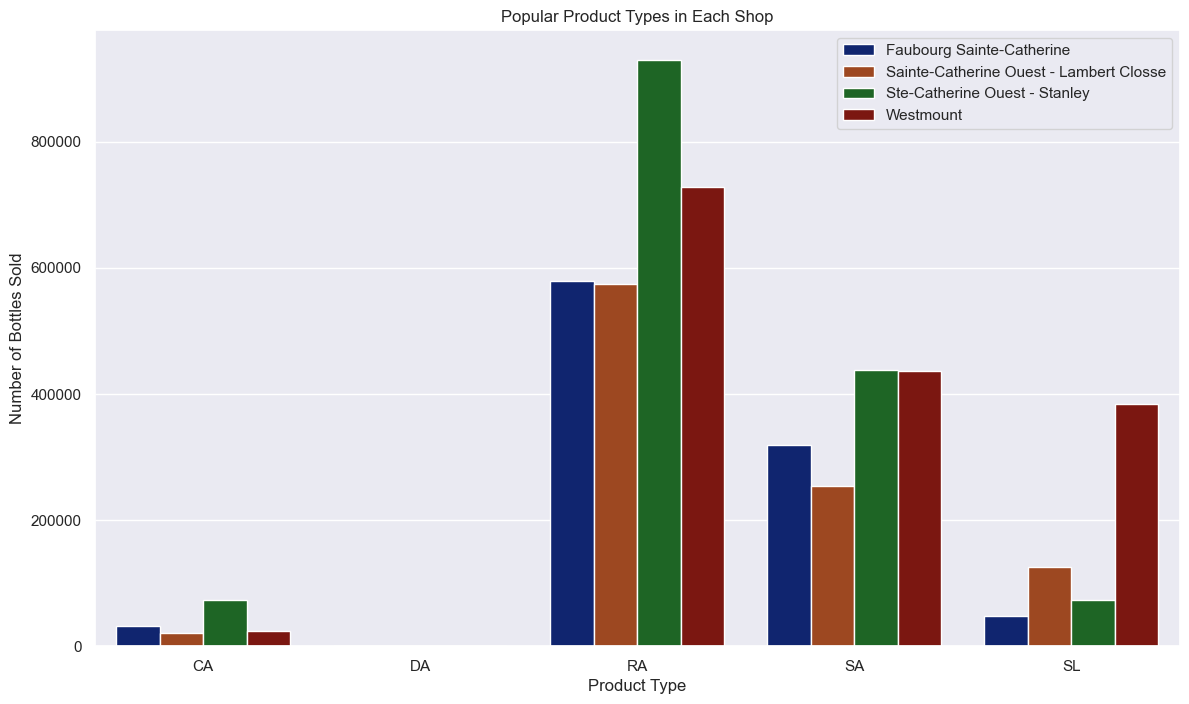

In [10]:
# Popular Products Per Shop
plt.figure(figsize=(14, 8))
sns.barplot(data=popular_products_per_shop, x='Type_listing', y='nb_bouteille_vendue', hue='Succursale_nom')
plt.xlabel('Product Type')
plt.ylabel('Number of Bottles Sold')
plt.title('Popular Product Types in Each Shop')
plt.legend()
plt.show()

## Prediction and forcasting Methods

Given the periodicity in the data (monthly sales), **SARIMA** (Seasonal ARIMA) is a strong candidate because it specifically handles seasonality along with trend and noise. However, **Prophet** offers additional flexibility and ease of use, making it very effective for business time series data with complex seasonal patterns and holidays.

### ARIMA method

C:\Users\User\AppData\Local\Temp\ipykernel_2408\90867969.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_sarima['Date'] = pd.date_range(start='2024-04-01', periods=len(data_sarima), freq='M')
C:\Users\User\anaconda\envs\pandas_playground\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda\envs\pandas_playground\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


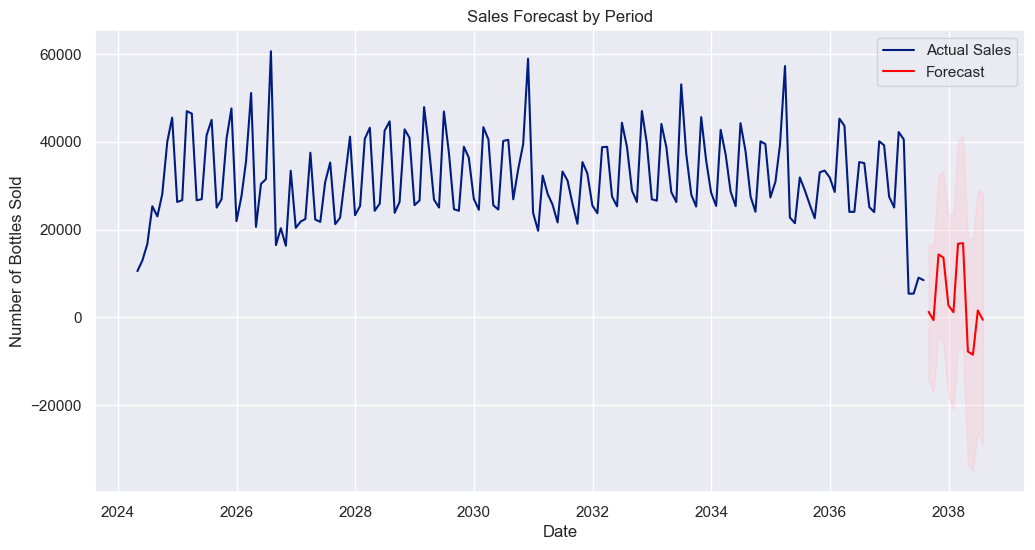

In [11]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

# Prepare data for SARIMA
data_sarima = data.groupby(['Year', 'Period', 'Succursale_nom']).agg(
    {'nb_bouteille_vendue': 'sum'}).reset_index()

# Create a sequential date index based on the periods
data_sarima['Period_Seq'] = data_sarima.groupby(['Succursale_nom']).cumcount() + 1
data_sarima['Date'] = pd.date_range(start='2024-04-01', periods=len(data_sarima), freq='M')
data_sarima = data_sarima.set_index('Date')

# Fit SARIMA model
model = SARIMAX(data_sarima['nb_bouteille_vendue'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
results = model.fit()

# Forecast future sales
forecast = results.get_forecast(steps=12)
forecast_df = forecast.conf_int()
forecast_df['Forecast'] = results.predict(start=forecast_df.index[0], end=forecast_df.index[-1])

# Plot forecast
plt.figure(figsize=(12, 6))
plt.plot(data_sarima.index, data_sarima['nb_bouteille_vendue'], label='Actual Sales')
plt.plot(forecast_df.index, forecast_df['Forecast'], label='Forecast', color='red')
plt.fill_between(forecast_df.index, forecast_df['lower nb_bouteille_vendue'], forecast_df['upper nb_bouteille_vendue'], 
                 color='pink', alpha=0.3)
plt.title('Sales Forecast by Period')
plt.xlabel('Date')
plt.ylabel('Number of Bottles Sold')
plt.legend()
plt.show()



09:25:25 - cmdstanpy - INFO - Chain [1] start processing
09:25:26 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\User\anaconda\envs\pandas_playground\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
C:\Users\User\anaconda\envs\pandas_playground\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\User\anaconda\envs\pandas_playground\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.a

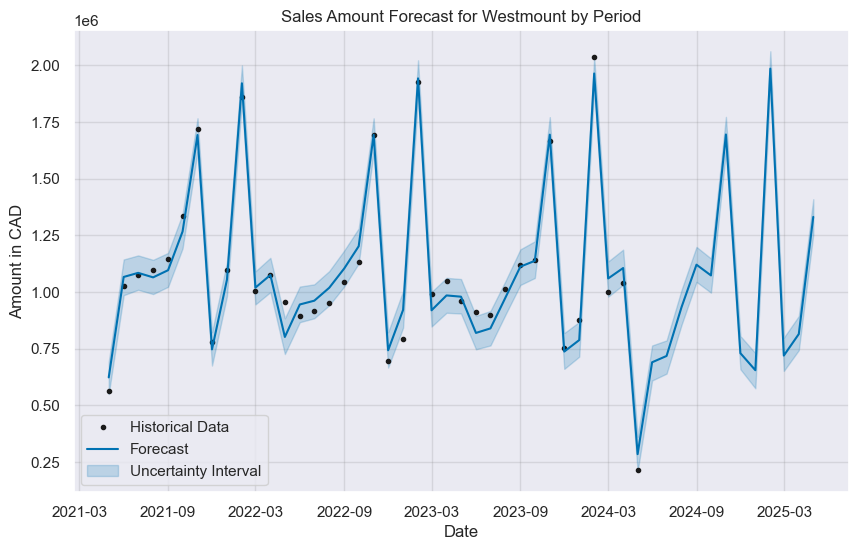

09:25:26 - cmdstanpy - INFO - Chain [1] start processing
09:25:26 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\User\anaconda\envs\pandas_playground\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
C:\Users\User\anaconda\envs\pandas_playground\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\User\anaconda\envs\pandas_playground\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.a

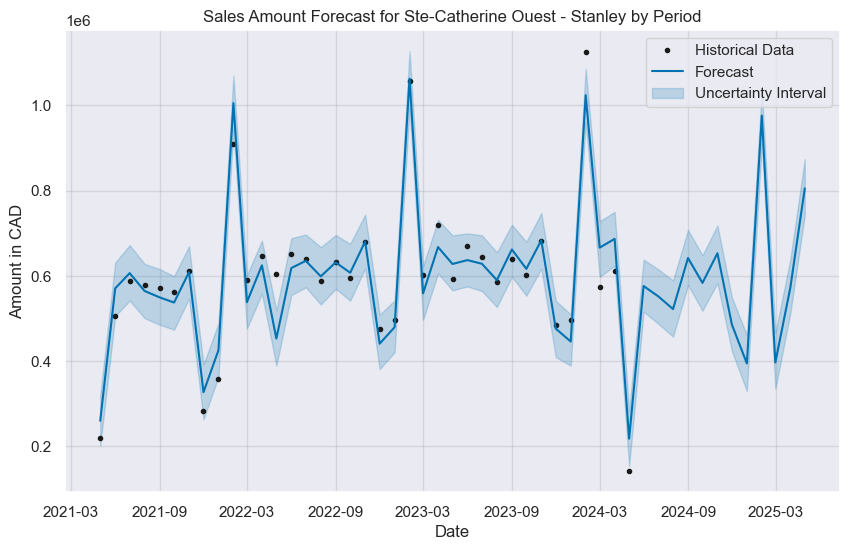

09:25:27 - cmdstanpy - INFO - Chain [1] start processing
09:25:27 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\User\anaconda\envs\pandas_playground\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
C:\Users\User\anaconda\envs\pandas_playground\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\User\anaconda\envs\pandas_playground\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.a

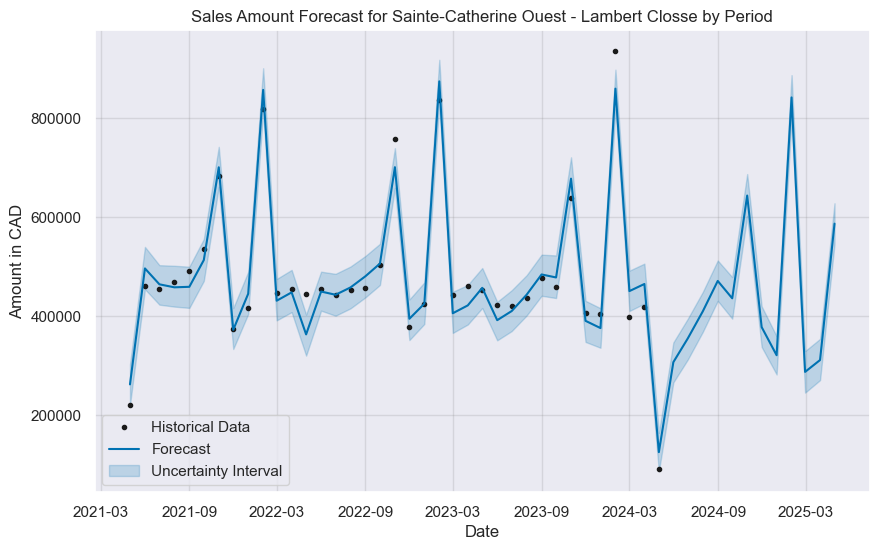

09:25:28 - cmdstanpy - INFO - Chain [1] start processing
09:25:28 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\User\anaconda\envs\pandas_playground\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
C:\Users\User\anaconda\envs\pandas_playground\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\User\anaconda\envs\pandas_playground\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.a

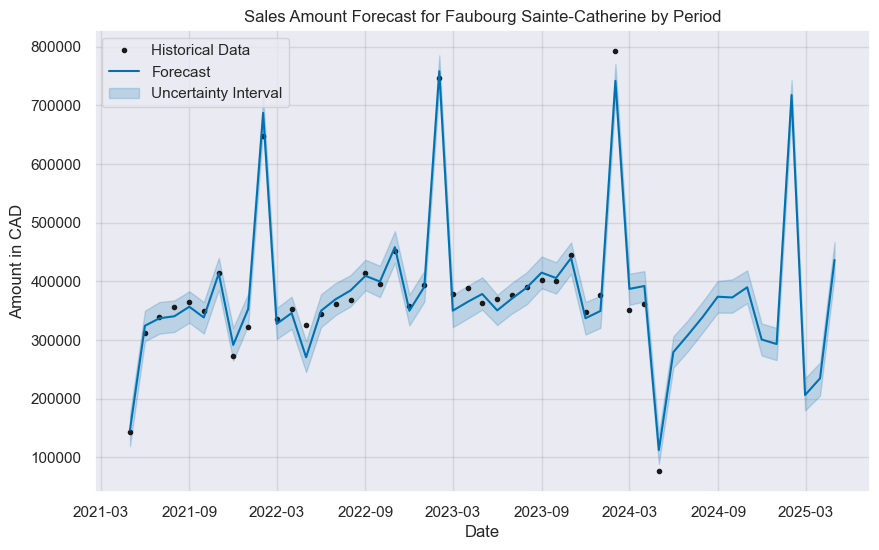

In [21]:
from prophet import Prophet

# Prepare data
data['Date'] = data.apply(
    lambda row: pd.Timestamp(year=row['Year'], month=(row['Period'] % 12) + 1, day=1) 
    + pd.DateOffset(years=row['Period'] // 12), axis=1)

# Loop through each shop and make predictions for the amount in CAD
for shop in data['Succursale_nom'].unique():
    shop_data = data[data['Succursale_nom'] == shop]
    shop_data = shop_data.groupby(['Date']).agg({'Mt_vente_brute_calculé_SVH': 'sum'}).reset_index()
    prophet_data = shop_data.rename(columns={'Date': 'ds', 'Mt_vente_brute_calculé_SVH': 'y'})
    
    model = Prophet()
    model.fit(prophet_data)
    
    future = model.make_future_dataframe(periods=12, freq='M')
    forecast = model.predict(future)
    
    # Plot forecast for each shop
    fig, ax = plt.subplots(figsize=(10, 6))
    model.plot(forecast, ax=ax)
    ax.set_title(f'Sales Amount Forecast for {shop} by Period')
    ax.set_xlabel('Date')
    ax.set_ylabel('Amount in CAD')
    ax.legend(['Historical Data', 'Forecast', 'Uncertainty Interval'])
    plt.show()


Because of the limited data in our dataset we cannot see more predections than the 4 first periods

09:59:22 - cmdstanpy - INFO - Chain [1] start processing
09:59:22 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\User\anaconda\envs\pandas_playground\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
C:\Users\User\anaconda\envs\pandas_playground\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\User\anaconda\envs\pandas_playground\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.a

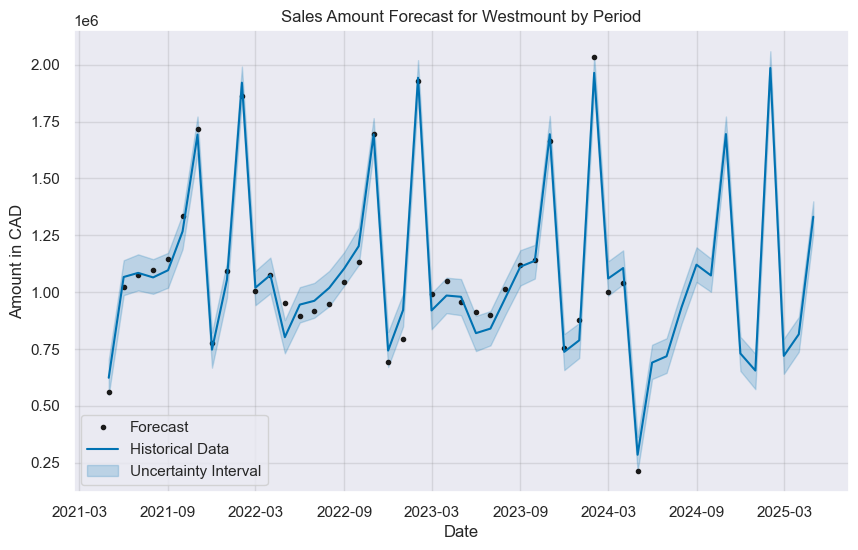

09:59:23 - cmdstanpy - INFO - Chain [1] start processing
09:59:23 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\User\anaconda\envs\pandas_playground\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
C:\Users\User\anaconda\envs\pandas_playground\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\User\anaconda\envs\pandas_playground\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.a

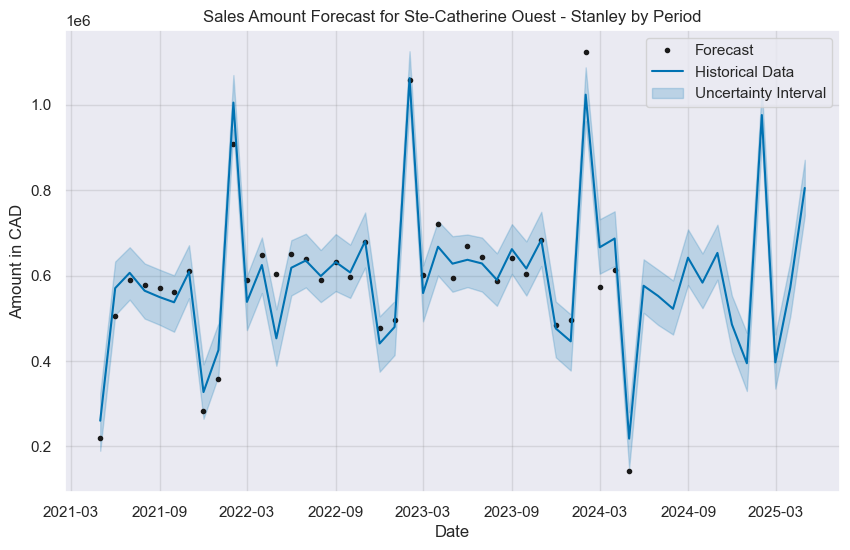

09:59:24 - cmdstanpy - INFO - Chain [1] start processing
09:59:24 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\User\anaconda\envs\pandas_playground\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
C:\Users\User\anaconda\envs\pandas_playground\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\User\anaconda\envs\pandas_playground\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.a

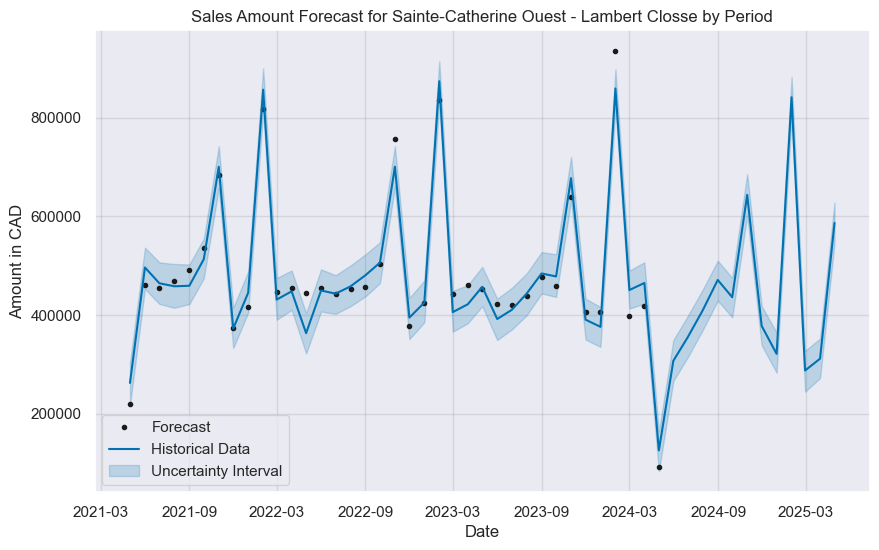

09:59:24 - cmdstanpy - INFO - Chain [1] start processing
09:59:25 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\User\anaconda\envs\pandas_playground\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
C:\Users\User\anaconda\envs\pandas_playground\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\User\anaconda\envs\pandas_playground\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.a

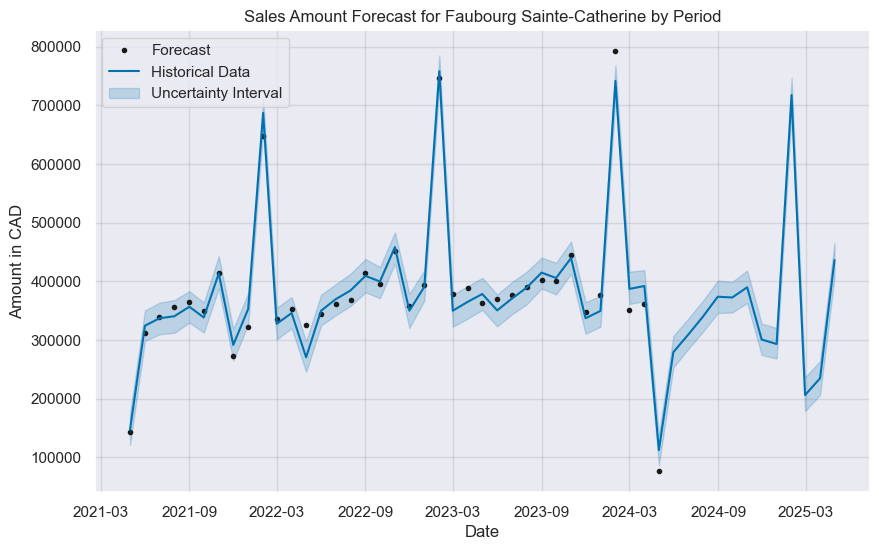

           ds          yhat             Succursale_nom
0  2021-05-01  6.233889e+05                  Westmount
1  2021-06-01  1.066693e+06                  Westmount
2  2021-07-01  1.084727e+06                  Westmount
3  2021-08-01  1.064858e+06                  Westmount
4  2021-09-01  1.096487e+06                  Westmount
..        ...           ...                        ...
44 2024-12-31  2.931733e+05  Faubourg Sainte-Catherine
45 2025-01-31  7.177683e+05  Faubourg Sainte-Catherine
46 2025-02-28  2.062405e+05  Faubourg Sainte-Catherine
47 2025-03-31  2.347176e+05  Faubourg Sainte-Catherine
48 2025-04-30  4.365546e+05  Faubourg Sainte-Catherine

[196 rows x 3 columns]
           ds          yhat Succursale_nom
0  2021-05-01  6.233889e+05      Westmount
1  2021-06-01  1.066693e+06      Westmount
2  2021-07-01  1.084727e+06      Westmount
3  2021-08-01  1.064858e+06      Westmount
4  2021-09-01  1.096487e+06      Westmount
5  2021-10-01  1.267065e+06      Westmount
6  2021-11-01  

In [23]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Prepare data
data['Date'] = data.apply(
    lambda row: pd.Timestamp(year=row['Year'], month=(row['Period'] % 12) + 1, day=1) 
    + pd.DateOffset(years=row['Period'] // 12), axis=1)

# Dictionary to store forecast results for each shop
forecast_dict = {}

# Loop through each shop and make predictions for the amount in CAD
for shop in data['Succursale_nom'].unique():
    shop_data = data[data['Succursale_nom'] == shop]
    shop_data = shop_data.groupby(['Date']).agg({'Mt_vente_brute_calculé_SVH': 'sum'}).reset_index()
    prophet_data = shop_data.rename(columns={'Date': 'ds', 'Mt_vente_brute_calculé_SVH': 'y'})
    
    model = Prophet()
    model.fit(prophet_data)
    
    future = model.make_future_dataframe(periods=12, freq='M')
    forecast = model.predict(future)
    
    forecast['Succursale_nom'] = shop
    forecast_dict[shop] = forecast[['ds', 'yhat', 'Succursale_nom']]
    
    # Plot forecast for each shop
    fig, ax = plt.subplots(figsize=(10, 6))
    model.plot(forecast, ax=ax)
    ax.set_title(f'Sales Amount Forecast for {shop} by Period')
    ax.set_xlabel('Date')
    ax.set_ylabel('Amount in CAD')
    # Adding legend
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, ['Forecast', 'Historical Data', 'Uncertainty Interval'])
    plt.show()

# Combine all forecasts into a single DataFrame for easy access
forecast_results_df = pd.concat(forecast_dict.values())

# Display the combined forecast table
print(forecast_results_df)

# Example: Accessing the forecast table for a specific shop
shop_name = 'Westmount'  # Change this to the desired shop name
forecast_table_for_shop = forecast_dict[shop_name]
print(forecast_table_for_shop)
